In [1467]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm 

plt.style.use(style='ggplot')
%matplotlib inline

In [1509]:
# Function Definitions:

def plot_corr_matrix(df, nr_c, targ) :
    
    corr     = df.corr()
    corr_abs = corr.abs()
    cols     = corr_abs.nlargest(nr_c, targ)[targ].index
    cm       = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 12}, 
                yticklabels=cols.values, xticklabels=cols.values,cmap="OrRd")
    plt.show()

    
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

def get_best_score(grid):  
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)    
    return best_score


# Convert Quality to Numerical 
def qual2num (s): 
    if  s.lower()  == 'ex':rate = 10
    elif s.lower() == 'gd':rate = 8
    elif s.lower() == 'ta':rate = 6 
    elif s.lower() == 'fa':rate = 4
    elif s.lower() == 'po':rate = 2
    else:                  rate = 0
    return rate

# Dummify a categorical variable column
# df - dataframe
# var - variable/feature string
# Prefix for dummies - string
def makedummies(df,var, pre_fix = 'Class'):
    Z = pd.get_dummies(df[var], prefix = pre_fix)
    df_dummified = pd.concat((df.drop(var,1), Z), axis=1)
    return df_dummified


In [1510]:
print('The current working directory is: ')
os.getcwd()

The current working directory is: 


'/Users/karolylajko/Documents/Academy/DataScienceBootcamp2020/Projects/Kaggle/Housedata'

In [1511]:
print('The files in this directory: ')
os.listdir()

The files in this directory: 


['.DS_Store',
 'Kaggle.ipynb',
 'corr.csv',
 'cdata_v1.csv',
 'fcorr.csv',
 'test.csv',
 'house price.ipynb',
 '.Rapp.history',
 'train.csv',
 '.ipynb_checkpoints']

In [1512]:
# Read in the files
dftrain = pd.read_csv('train.csv')
dftest  = pd.read_csv('test.csv')

In [1513]:
print('Dims of train data: ',dftrain.shape)
print('Dims of test data : ',dftest.shape)

Dims of train data:  (1460, 81)
Dims of test data :  (1459, 80)


In [1514]:
dftrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [1515]:
dftest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [1516]:
# dftrain.describe(include = 'all').transpose()

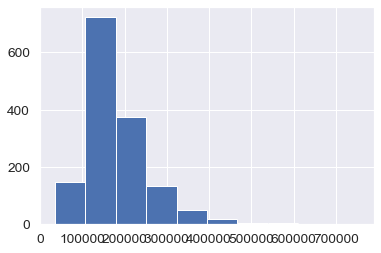

In [1517]:
# Check the target variable distribution:
Saleprice = dftrain.SalePrice
Saleprice_log = np.log(dftrain.SalePrice)
Saleprice.hist()
dftrain.drop('Id',1,inplace = True)
dftest.drop('Id',1,inplace = True)

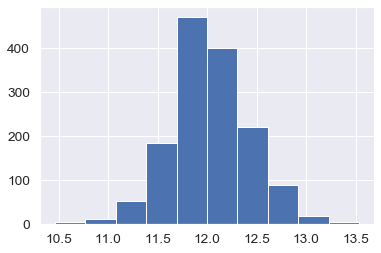

In [1518]:
# The target variable has left skew
# Use log to transform the distribution
Saleprice_log.hist()

In [1519]:
#  dftrain.dtypes[dftrain.dtypes=='object']

In [1520]:
#dfcategorical

print('The number of categorical variables: ',dftrain.dtypes[dftrain.dtypes=='object'].count())
print('The number of numerical variables: ',dftrain.dtypes[dftrain.dtypes!='object'].count())



The number of categorical variables:  43
The number of numerical variables:  37


In [1521]:
print('The different types of data in the dataset: \n',dftrain.dtypes.value_counts())

The different types of data in the dataset: 
 object     43
int64      34
float64     3
dtype: int64


In [1522]:
# Generating the indexes for the numerical and categorical variables
categorical_inx = dftrain.dtypes[dftrain.dtypes=='object'].index
numerical_inx = dftrain.dtypes[dftrain.dtypes!='object'].index

In [1523]:
print('All categorical variables: \n',dftrain[categorical_inx].columns.to_list())

All categorical variables: 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [1524]:
print('All numerical variables: \n',dftrain[numerical_inx].columns.to_list())

All numerical variables: 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [1525]:
# Check the distributions of the variables visually
# dftrain.drop('SalePrice',1).hist(figsize=(14,14),bins=30)

In [1526]:
print('Top 10 variables of missing values')
dftrain.isnull().sum().sort_values(ascending=False)[:10]

Top 10 variables of missing values


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
dtype: int64

In [1527]:

# List and Visualize the missing values and proportions of 
# missing values 
tot_miss_count = dftrain.isnull().sum().sort_values(ascending=False)
percent_miss_count = (dftrain.isnull().sum()/dftrain.isnull().count()).sort_values(ascending=False)

pd.concat([tot_miss_count,percent_miss_count], axis =1,keys=['NA_count','NA_percent'])[:20]

,NA_count,NA_percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [1528]:
# Plan to impute these columns in some way
cols_tofillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

In [1529]:
# Checking if all items are spelled OK and exist
[var for var in cols_tofillna if not var in dftrain.columns]

[]

In [1530]:
# print('Filling None for NAs for columns', dftrain[cols_tofillna].head())
dftrain[cols_tofillna].head()

for variable in cols_tofillna:
    dftrain[variable].fillna('None',inplace = True)
    dftest[variable].fillna('None',inplace=True)
    
    
# Check the latest result:
dftrain[cols_tofillna].head()

,PoolQC,MiscFeature,Alley,Fence,MasVnrType,FireplaceQu,GarageQual,GarageCond,GarageFinish,GarageType,...,Functional,Exterior2nd,Exterior1st,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2,MSZoning,Utilities
0,None,None,None,None,BrkFace,None,TA,TA,RFn,Attchd,...,Typ,VinylSd,VinylSd,No,TA,Gd,GLQ,Unf,RL,AllPub
1,None,None,None,None,None,TA,TA,TA,RFn,Attchd,...,Typ,MetalSd,MetalSd,Gd,TA,Gd,ALQ,Unf,RL,AllPub
2,None,None,None,None,BrkFace,TA,TA,TA,RFn,Attchd,...,Typ,VinylSd,VinylSd,Mn,TA,Gd,GLQ,Unf,RL,AllPub
3,None,None,None,None,None,Gd,TA,TA,Unf,Detchd,...,Typ,Wd Shng,Wd Sdng,No,Gd,TA,ALQ,Unf,RL,AllPub
4,None,None,None,None,BrkFace,TA,TA,TA,RFn,Attchd,...,Typ,VinylSd,VinylSd,Av,TA,Gd,GLQ,Unf,RL,AllPub


In [1531]:
tot_miss_count = dftrain.isnull().sum().sort_values(ascending=False)
percent_miss_count = (dftrain.isnull().sum()/dftrain.isnull().count()).sort_values(ascending=False)

pd.concat([tot_miss_count,percent_miss_count], axis =1,keys=['NA_count','NA_percent'])[:10]

,NA_count,NA_percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000
ExterQual,0,0.000000


In [1532]:
print('Fill with mean for the remaining variables: ',['LotFrontage','GarageYrBlt','MasVnrArea'])

# dftrain.MasVnrArea[dftrain.MasVnrArea.isnull()]

for var in ['LotFrontage','GarageYrBlt','MasVnrArea']:
    dftrain[var].fillna(dftrain[var].mean(),inplace = True)
    dftest[var].fillna(dftest[var].mean(), inplace = True)

Fill with mean for the remaining variables:  ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


In [1533]:
tot_miss_count = dftrain.isnull().sum().sort_values(ascending=False)
percent_miss_count = (dftrain.isnull().sum()/dftrain.isnull().count()).sort_values(ascending=False)

pd.concat([tot_miss_count,percent_miss_count], axis =1,keys=['NA_count','NA_percent'])[:10]

,NA_count,NA_percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [1534]:
# Checking for Normality in numerival values:
for col in numerical_inx:
        print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(dftrain[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(dftrain[col].kurt())  
         )
    

MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.38     Kurtosis: 021.85
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.15
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 016.40
FullBath        Skewness: 00.04     Kurtosis: 

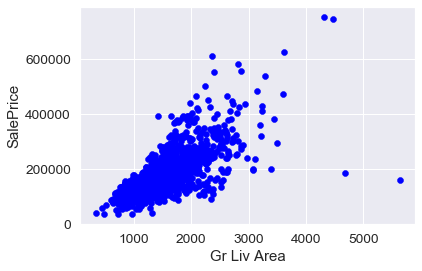

In [1535]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x=dftrain['GrLivArea'], y=dftrain['SalePrice'], 
            color="blue", linewidths=0.5);
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.show()

In [1536]:
# Apply log to the GrLivArea and LotArea

for df in [dftrain, dftest]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace= True, axis = 1)

In [1537]:
# # Plotting the continuous variables vs target variable

# import matplotlib.gridspec as gridspec
# import seaborn as sns
# import matplotlib.gridspec as gridspec
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# contx = dftrain.drop(categorical_inx, 1).drop('SalePrice',1)
# conty = dftrain['SalePrice']

# cols = contx.shape[1]

# fig = plt.figure(figsize=(40, 20))
# gs  = gridspec.GridSpec(cols, 2)



# for i in range(cols):
#     ax1 = plt.subplot(gs[i, 0])
#     ax2 = plt.subplot(gs[i, 1])    
#     sns.regplot(conty, contx.iloc[:, i], ax=ax1)
#     ax1.set_title('')
#     ax1.set_xlabel('')
#     ylim = ax1.get_ylim()   
#     contx[contx.columns[i]].hist(bins=50, ax=ax2, orientation='horizontal')    
#     ax2.set_ylim((ylim[0], ylim[1]))
#     ax2.set_xlabel('')
#     ax2.set_xlim((0, 200))
#     for tick in ax2.yaxis.get_major_ticks():
#         tick.label1On = False
#         tick.label2On = True
#     if i != 0:
#         ax1.set_xticklabels([''])
#         ax2.set_xticklabels([''])
#     else:
#         ax1.set_title('SalePrice \n', size=15)
#         ax2.set_title('Count \n',     size=15)
#         for tick in ax1.xaxis.get_major_ticks():
#             tick.label1On = False
#             tick.label2On = True
#         for tick in ax2.xaxis.get_major_ticks():
#             tick.label1On = False
#             tick.label2On = True
# #plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# #plt.tight_layout()
# plt.show()

In [1538]:
contxsub = dftrain.iloc[:,1:10]
contxsub

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope
0,RL,65.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl
1,RL,80.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl
2,RL,68.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl
3,RL,60.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl
4,RL,84.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl
...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl
1456,RL,85.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl
1457,RL,66.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl
1458,RL,68.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl


In [1539]:
contx = dftrain.drop(categorical_inx, 1).drop('SalePrice',1)
contx

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GrLivArea_Log,LotArea_Log
0,60,65.0,7,5,2003,2003,196.0,706,0,150,...,61,0,0,0,0,0,2,2008,7.444249,9.041922
1,20,80.0,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,0,0,5,2007,7.140453,9.169518
2,60,68.0,7,5,2001,2002,162.0,486,0,434,...,42,0,0,0,0,0,9,2008,7.487734,9.328123
3,70,60.0,7,5,1915,1970,0.0,216,0,540,...,35,272,0,0,0,0,2,2006,7.448334,9.164296
4,60,84.0,8,5,2000,2000,350.0,655,0,490,...,84,0,0,0,0,0,12,2008,7.695303,9.565214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,6,5,1999,2000,0.0,0,0,953,...,40,0,0,0,0,0,8,2007,7.406711,8.976768
1456,20,85.0,6,6,1978,1988,119.0,790,163,589,...,0,0,0,0,0,0,2,2010,7.636752,9.486076
1457,70,66.0,7,9,1941,2006,0.0,275,0,877,...,60,0,0,0,0,2500,5,2010,7.757906,9.109636
1458,20,68.0,5,6,1950,1996,0.0,49,1029,0,...,0,112,0,0,0,0,4,2010,6.982863,9.181632


In [1540]:
contx.shape[1]

36

In [1541]:
# cat_feats = list(categorical_inx)
# nr_rows = 22
# nr_cols = 2

# fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

# for r in range(0,nr_rows):
#     for c in range(0,nr_cols):  
#         i = r*nr_cols+c
#         if i < len(cat_feats):
#             sns.boxplot(x=cat_feats[i], y=dftrain.SalePrice, data=dftrain, ax = axs[r][c])
    
# plt.tight_layout()    
# plt.show()

## Outliers

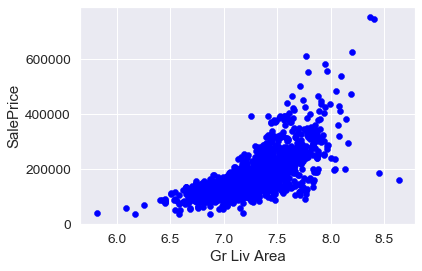

In [1542]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x=dftrain['GrLivArea_Log'], y=dftrain['SalePrice'], 
            color="blue", linewidths=0.5);
plt.xlabel("Gr Liv Area")
plt.ylabel("SalePrice")
plt.show()

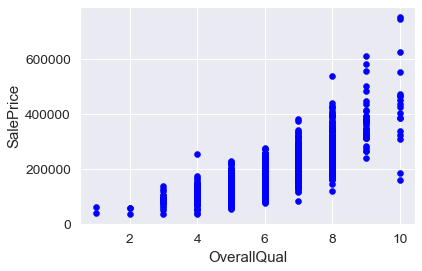

In [1543]:
plt.scatter(x=dftrain['OverallQual'], y=dftrain['SalePrice'], 
            color="blue", linewidths=0.5);
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

In [1544]:
# # # Check for outliers
# dftrain = dftrain.drop(dftrain[(dftrain['OverallQual']==10) & (np.log(dftrain['SalePrice'])<12.3)].index)
# dftrain = dftrain.drop(dftrain[(dftrain['GrLivArea_Log']>8.3) & (np.log(dftrain['SalePrice'])<12.5)].index)
# len(categorical_inx)


# target   = dftrain['SalePrice']
# min_val_corr = 0.4
# nr_num_cols = len(categorical_inx)



In [1545]:
dftrain.head()

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GrLivArea_Log,LotArea_Log
0,60,RL,65.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,None,None,0,2,2008,WD,Normal,208500,7.444249,9.041922
1,20,RL,80.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,None,None,0,5,2007,WD,Normal,181500,7.140453,9.169518
2,60,RL,68.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,None,None,0,9,2008,WD,Normal,223500,7.487734,9.328123
3,70,RL,60.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,None,None,0,2,2006,WD,Abnorml,140000,7.448334,9.164296
4,60,RL,84.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,None,None,0,12,2008,WD,Normal,250000,7.695303,9.565214


In [1546]:


cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [1547]:
cols_abv_corr_limit

['SalePrice',
 'OverallQual',
 'GrLivArea_Log',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'GarageYrBlt',
 'Fireplaces']

In [1548]:

catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

print('Based on boxplot results: \n',catg_strong_corr)

Based on boxplot results: 
 ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


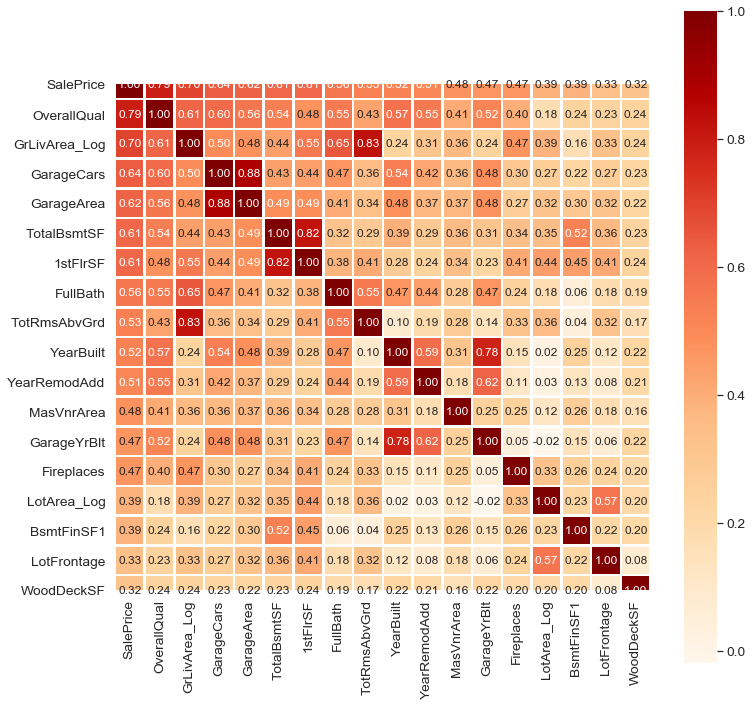

In [1549]:
plot_corr_matrix(dftrain, 18, 'SalePrice')
#len(cols_abv_corr_limit)


In [1550]:
# Drop the weak categoricals and the low correlational numericals 
# for both train and test data.

for df in [dftrain, dftest]:
    df.drop(catg_weak_corr, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit,inplace =True, axis =1 )

In [1551]:
dftrain.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrice,GrLivArea_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,Gd,Gd,...,2,Gd,8,0,2003.0,2,548,WD,208500,7.444249
1,RL,Veenker,Norm,6,1976,1976,None,0.0,TA,Gd,...,2,TA,6,1,1976.0,2,460,WD,181500,7.140453
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,Gd,Gd,...,2,Gd,6,1,2001.0,2,608,WD,223500,7.487734
3,RL,Crawfor,Norm,7,1915,1970,None,0.0,TA,TA,...,1,Gd,7,1,1998.0,3,642,WD,140000,7.448334
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,Gd,Gd,...,2,Gd,9,1,2000.0,3,836,WD,250000,7.695303


In [1552]:
dftest.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,GrLivArea_Log
0,RH,NAmes,Norm,5,1961,1961,None,0.0,TA,TA,...,896,1,TA,5,0,1961.0,1.0,730.0,WD,6.797940
1,RL,NAmes,Norm,6,1958,1958,BrkFace,108.0,TA,TA,...,1329,1,Gd,6,0,1958.0,1.0,312.0,WD,7.192182
2,RL,Gilbert,Norm,5,1997,1998,None,0.0,TA,Gd,...,928,2,TA,6,1,1997.0,2.0,482.0,WD,7.395722
3,RL,Gilbert,Norm,6,1998,1998,BrkFace,20.0,TA,TA,...,926,2,Gd,7,1,1998.0,2.0,470.0,WD,7.380256
4,RL,StoneBr,Norm,8,1992,1992,None,0.0,Gd,Gd,...,1280,2,Gd,5,0,1992.0,2.0,506.0,WD,7.154615


In [1553]:

# From the table above get all categorigals
# Assign it to a list
latest_cat = dftrain.dtypes[dftrain.dtypes=='object'].index

In [1554]:
# For each categorical variable look at the classes and their frequency
# For assymetric distribution just drop 
# For OK vars convert to numerical

for item in latest_cat:
    print(dftrain[item].value_counts())
    print('--'*20)
    

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
----------------------------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
----------------------------------------
Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64
----------------------------------------
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
----------------------------------------
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
-------

In [1555]:
dftrain.Condition2.value_counts() 

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [1556]:
# Convert Qualities from Text to Numerics
dftrain.KitchenQual  = dftrain.KitchenQual.apply(lambda x : qual2num(x))
dftrain.BsmtQual     = dftrain.BsmtQual.apply   (lambda x : qual2num(x))
dftrain.ExterQual    = dftrain.ExterQual.apply  (lambda x : qual2num(x))

dftest.KitchenQual  = dftest.KitchenQual.apply(lambda x : qual2num(x))
dftest.BsmtQual     = dftest.BsmtQual.apply   (lambda x : qual2num(x))
dftest.ExterQual    = dftest.ExterQual.apply  (lambda x : qual2num(x))


In [1557]:
dftrain.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrice,GrLivArea_Log
0,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,8,8,...,2,8,8,0,2003.0,2,548,WD,208500,7.444249
1,RL,Veenker,Norm,6,1976,1976,None,0.0,6,8,...,2,6,6,1,1976.0,2,460,WD,181500,7.140453
2,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,8,8,...,2,8,6,1,2001.0,2,608,WD,223500,7.487734
3,RL,Crawfor,Norm,7,1915,1970,None,0.0,6,6,...,1,8,7,1,1998.0,3,642,WD,140000,7.448334
4,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,8,8,...,2,8,9,1,2000.0,3,836,WD,250000,7.695303


In [1558]:
# List the remaining categoricals
exclude_list = dftrain.dtypes[dftrain.dtypes=='object'].index
dftrain.dtypes[dftrain.dtypes=='object'].index

Index(['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'CentralAir',
       'Electrical', 'SaleType'],
      dtype='object')

In [1559]:
# Drop them for now for both train and test
dftrain.drop(exclude_list,1,inplace=True)
dftest.drop (exclude_list,1,inplace=True)



# dftrain.drop('GarageYrBlt',1,inplace=True)
# dftest.drop ('GarageYrBlt',1,inplace=True)

In [1560]:
dftrain.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice,GrLivArea_Log
0,7,2003,2003,196.0,8,8,856,856,2,8,8,0,2003.0,2,548,208500,7.444249
1,6,1976,1976,0.0,6,8,1262,1262,2,6,6,1,1976.0,2,460,181500,7.140453
2,7,2001,2002,162.0,8,8,920,920,2,8,6,1,2001.0,2,608,223500,7.487734
3,7,1915,1970,0.0,6,6,756,961,1,8,7,1,1998.0,3,642,140000,7.448334
4,8,2000,2000,350.0,8,8,1145,1145,2,8,9,1,2000.0,3,836,250000,7.695303


In [1561]:
# See the correlations of the latest variables to target variables

dftrain.corr()['SalePrice']

OverallQual      0.790982
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
ExterQual        0.682639
BsmtQual         0.585207
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
KitchenQual      0.659600
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.470177
GarageCars       0.640409
GarageArea       0.623431
SalePrice        1.000000
GrLivArea_Log    0.695118
Name: SalePrice, dtype: float64

In [1562]:
dftest.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GrLivArea_Log
0,5,1961,1961,0.0,6,6,882.0,896,1,6,5,0,1961.0,1.0,730.0,6.797940
1,6,1958,1958,108.0,6,6,1329.0,1329,1,8,6,0,1958.0,1.0,312.0,7.192182
2,5,1997,1998,0.0,6,8,928.0,928,2,6,6,1,1997.0,2.0,482.0,7.395722
3,6,1998,1998,20.0,6,6,926.0,926,2,8,7,1,1998.0,2.0,470.0,7.380256
4,8,1992,1992,0.0,8,8,1280.0,1280,2,8,5,0,1992.0,2.0,506.0,7.154615


In [1563]:
dftrain.shape

(1460, 17)

##  Normalizing the Data Columns

- Normalization rescales the values into a range of [0,1].
- Standardization typically means rescales data to have a 
- mean of 0 and a standard deviation of 1 (unit variance)
- **Normalization** and **standardization** are slightly different.
- **Normalization** transforms the data columns, dividing by its **L2** norm
- **Standardization** transforms the data columns, dividing by the standard deviation of the feature column.
- The **std** and **L2** norm differ by the scale $\sqrt(N)$, where $N$ is the sample size.

In [1564]:
# Create the standardized version of the datasets

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftrain.drop('SalePrice',1))
dftrain_scaled = scaler.transform(dftrain.drop('SalePrice',1))
# dftrain_y_scaled = scaler.transform(dftrain['SalePrice']) # not needed?
dftest_scaled  = scaler.transform(dftest)


In [1565]:
# See  quick statics of normalized variables
# import statsmodels.api as sm 
# ols = sm.OLS(dftrain['SalePrice'], sm.add_constant(dftrain_scaled))
# ans = ols.fit()
# print(ans.summary())

## Linear Regression - No regularization

In [1566]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets

linear_model = LinearRegression()

nr_cv = 5
score_calc = 'neg_mean_squared_error'

parameters = {'normalize':[True,False]}

grid_linear = GridSearchCV(linear_model, parameters, cv=nr_cv, verbose=1 , scoring = score_calc)
grid_linear.fit(dftrain.drop('SalePrice',1), Saleprice_log)
print('Gridsearch Object Best Score: ',grid_linear.best_score_)



Fitting 5 folds for each of 2 candidates, totalling 10 fits
Gridsearch Object Best Score:  -0.026368631040232935


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [1636]:
lncolnames = dftrain.drop('SalePrice',1).columns
lnresult = pd.DataFrame(grid_linear.best_estimator_.coef_).transpose()

lnresult.columns = lncolnames.tolist()
print(lncolnames.tolist())
lnresult['intercept'] = grid_linear.best_estimator_.intercept_ 
lnresult = lnresult.transpose()
lnresult.columns = ['Linear coefficient']
lnresult

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GrLivArea_Log']


,Linear coefficient
OverallQual,0.066281
YearBuilt,0.002018
YearRemodAdd,0.001951
MasVnrArea,0.000024
ExterQual,0.006988
BsmtQual,0.017789
TotalBsmtSF,0.000050
1stFlrSF,0.000056
FullBath,-0.013820
KitchenQual,0.023638


,coefficient


### Error Calculation
All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric.

In [1573]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

scores = cross_val_score(grid_linear, dftrain.drop('SalePrice',1), Saleprice_log, cv=nr_cv)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Make predictions using the testing set
price_y_pred = grid_linear.predict(dftrain.drop('SalePrice',1))

print('Mean squared error: %.2f'
      % mean_squared_error(Saleprice_log, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Saleprice_log, price_y_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Mean squared error: 0.02
Coefficient of determination: 0.84


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


## Ridge Regression Model

In [1638]:
# Do Ridge Regression and See Results

ridge_model = Ridge()

# Set Regularization terms
alphaRange = np.linspace(1e-3,1e3,20)
parameters = {'alpha':[0.001,0.01,0.1,1,10,100,1000]}

grid_ridge = GridSearchCV(ridge_model, parameters, cv=nr_cv, verbose=1, scoring = score_calc)

grid_ridge.fit(dftrain.drop('SalePrice',1), Saleprice_log)

#Calculate Errors
print('Gridsearch Object Best Score: ',grid_ridge.best_score_)
print('Gridsearch Object Best Parameters: ',grid_ridge.best_params_)
ridge_price_y_pred = grid_ridge.predict(dftrain.drop('SalePrice',1))

print('Mean squared error: %.2f'% mean_squared_error(Saleprice_log, ridge_price_y_pred))


print('Coefficient of determination R^2: %.2f'% r2_score(Saleprice_log, ridge_price_y_pred))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Gridsearch Object Best Score:  -0.026362403289815463
Gridsearch Object Best Parameters:  {'alpha': 1}
Mean squared error: 0.02
Coefficient of determination R^2: 0.84


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished


In [1575]:
grid_ridge.cv_results_

{'mean_fit_time': array([0.00434017, 0.00402784, 0.00406017, 0.0043263 , 0.00424051,
        0.00343137, 0.00241861]),
 'std_fit_time': array([0.00130133, 0.0010554 , 0.00121775, 0.00095601, 0.00090931,
        0.00091493, 0.00019098]),
 'mean_score_time': array([0.00164609, 0.00160213, 0.00151482, 0.00164137, 0.00203705,
        0.00139022, 0.00104761]),
 'std_score_time': array([1.31791735e-04, 1.30145136e-04, 1.18744670e-04, 1.32071119e-04,
        5.63569619e-04, 1.68064637e-04, 6.88612954e-05]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000}],
 'split0_test_score': array([-0.02100904, -0.021009  , -0.02100864, -0.02100901, -0.02120059,
        -0.02251393, -0.02520616]),
 'split1_test_score': array([-0.

In [1639]:
grid_ridge.best_estimates_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimates_'

## Ridge Regularization

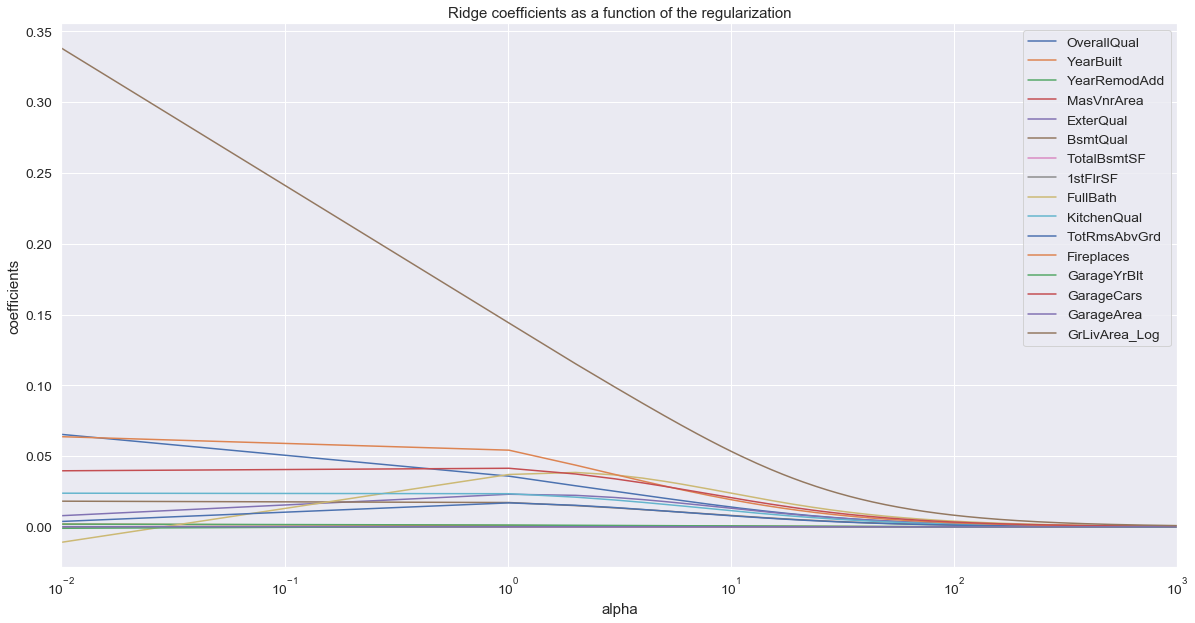

In [1577]:
alphas_ridge   = np.linspace(0.01,1000, 1000)

coef_ridge     = []
R2_ridge       = []
CVscoresr       = []

# lasso = Lasso(alpha=1)
# normalize=True
for i in alphas_ridge:
    grid_ridge.best_estimator_.set_params(alpha=i,normalize=True).fit(dftrain.drop('SalePrice',1), Saleprice_log)
    coef_ridge.append(grid_ridge.best_estimator_.coef_)
#     coef_lasso.append(lasso.coef_)

df_coef = pd.DataFrame(coef_ridge, index=alphas_ridge, columns=dftrain.drop('SalePrice',1).columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title,figsize=(20,10))
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

## Lasso Regression Model

In [1601]:
# Do Ridge Regression and See Results

lasso_model = Lasso()

# Set Regularization terms
alphaRange = np.linspace(1e-3,1e3,20)
# parameters = {'alpha':[0.001,0.01,0.1,1,10,100,1000],'normalize':[True]}
parameters = {'alpha':alphaRange,'normalize':[True]}
grid_lasso = GridSearchCV(lasso_model, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
grid_lasso.fit(dftrain.drop('SalePrice',1), Saleprice_log)

#Calculate Errors
print('Gridsearch Object Best Score: '     ,grid_lasso.best_score_)
print('Gridsearch Object Best Parameters: ',grid_lasso.best_params_)

lasso_price_y_pred = grid_lasso.predict(dftrain.drop('SalePrice',1))

# The coefficient of determination, the higher the better: R^2 = 1-RSS/TSS
print('Mean squared error: %.2f'% mean_squared_error(Saleprice_log, lasso_price_y_pred))
print('Coefficient of determination: %.2f' % r2_score(Saleprice_log, lasso_price_y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Gridsearch Object Best Score:  -0.028847704161876257
Gridsearch Object Best Parameters:  {'alpha': 0.001, 'normalize': True}
Mean squared error: 0.03
Coefficient of determination: 0.82


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [976]:
# grid_lasso.cv_results_

## Lasso Regularization 

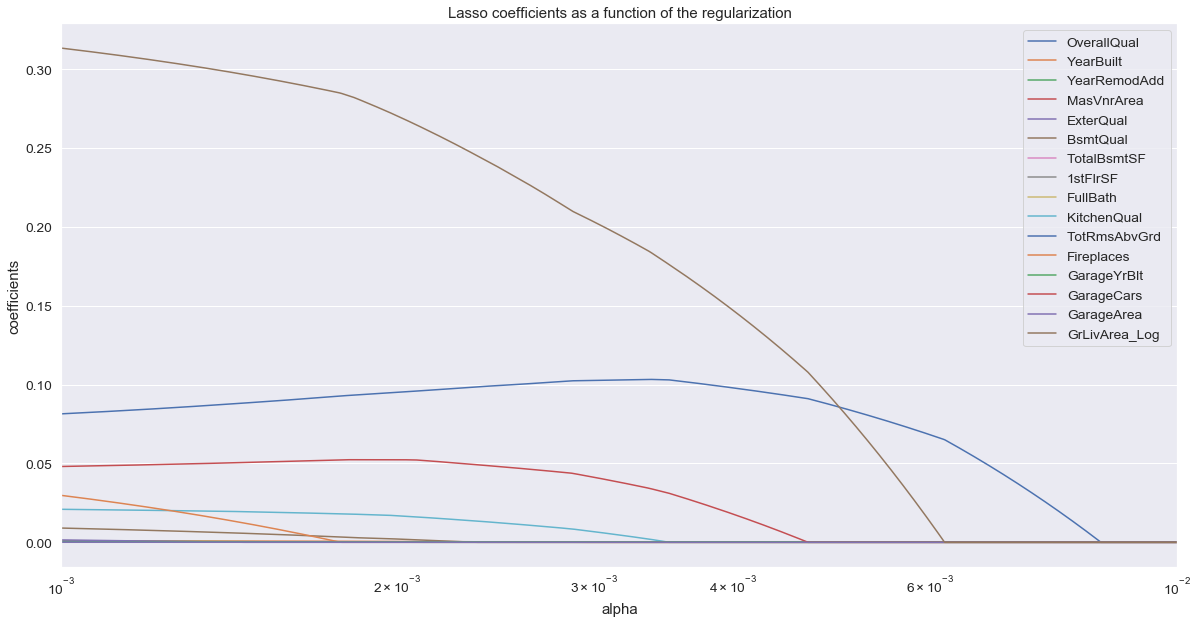

In [1591]:
alphas_lasso   = np.linspace(0.001,0.01, 1000)
coef_lasso     = []
R2_lasso       = []
CVscores       = []

# lasso = Lasso(alpha=1)
# normalize=True
for i in alphas_lasso:
    grid_lasso.best_estimator_.set_params(alpha=i,normalize=True).fit(dftrain.drop('SalePrice',1), Saleprice_log)
    coef_lasso.append(grid_lasso.best_estimator_.coef_)
#     coef_lasso.append(lasso.coef_)

df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=dftrain.drop('SalePrice',1).columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title,figsize=(20,10))
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()


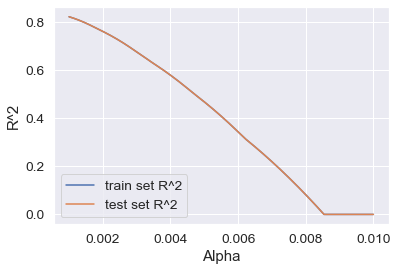

In [1583]:
train_R2 = []
test_R2  = []
# alphaRange = np.linspace(1e-3,200,20)
alphas_lasso   = np.linspace(0.001,0.01, 500)

for alpha in alphas_lasso:
    grid_lasso.best_estimator_.set_params(alpha=alpha, normalize=True)  
    grid_lasso.best_estimator_.fit(dftrain.drop('SalePrice',1), Saleprice_log)
    train_R2.append(grid_lasso.best_estimator_.score(dftrain.drop('SalePrice',1), Saleprice_log))
    test_R2.append(grid_lasso.best_estimator_.score(dftrain.drop('SalePrice',1), Saleprice_log))
plt.plot(alphas_lasso, train_R2, label=r'train set R^2')
plt.plot(alphas_lasso, test_R2, label=r'test set R^2')
plt.title = 'Lasso coefficients as a function of the regularization'
plt.xlabel('Alpha')
plt.ylabel('R^2')

plt.legend(loc=3)

In [1584]:
dftrain.drop('SalePrice',1).columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GrLivArea_Log'],
      dtype='object')

In [1585]:


# print('Cross validation results and coefficients: ')
# grid_lasso.cv_results_
# grid_lasso.best_estimator_.coef_
# grid_lasso.best_estimator_.intercept_

In [1606]:
grid_linear.best_estimator_.coef_

array([ 6.62808440e-02,  2.01849672e-03,  1.95074055e-03,  2.42100019e-05,
        6.98821998e-03,  1.77886679e-02,  5.04349706e-05,  5.60679905e-05,
       -1.38200241e-02,  2.36382041e-02,  2.27401824e-03,  6.28164480e-02,
       -1.08454641e-03,  3.87600035e-02,  1.45232431e-04,  3.52737898e-01])

In [1602]:
grid_lasso.best_estimator_.coef_

array([8.14795752e-02, 1.02433600e-03, 7.97100943e-04, 0.00000000e+00,
       1.50823470e-03, 9.03757692e-03, 5.75446310e-05, 2.43253843e-05,
       0.00000000e+00, 2.09338462e-02, 0.00000000e+00, 2.97550315e-02,
       0.00000000e+00, 4.80908588e-02, 6.11012032e-05, 3.13419241e-01])

In [1603]:
grid_ridge.best_estimator_.coef_

array([2.34360386e-04, 7.69598013e-06, 1.08594193e-05, 9.42754497e-07,
       2.34254998e-04, 1.39269961e-04, 5.53165164e-07, 6.12306981e-07,
       4.27888933e-04, 1.99455806e-04, 1.30429082e-04, 3.01387091e-04,
       8.25841319e-06, 3.61055685e-04, 1.20677230e-06, 8.68682109e-04])

In [1604]:
gs_elastic.best_estimator_.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Elastic Net Regression

In [1629]:
# LinearRegression, Ridge, Lasso, ElasticNet
print('Doing Elastic Net Regularization')

elastic_model = ElasticNet()

# Set Regularization terms
alphaRange = np.linspace(1e-3,1e3,20)
l1_range   = np.linspace(0.1,0.8, 4)

parameters = {'alpha':alphaRange,'normalize':[True],'l1_ratio':l1_range}

gs_elastic = GridSearchCV(elastic_model, parameters, cv=nr_cv, verbose=1, scoring = score_calc)
gs_elastic.fit(dftrain.drop('SalePrice',1), Saleprice_log)

# Display Results:
print('Gridsearch Object Best Score: '     ,gs_elastic.best_score_)
print('Gridsearch Object Best Parameters: ',gs_elastic.best_params_)

elastic_y_pred = gs_elastic.predict(dftrain.drop('SalePrice',1))

print('Mean squared error: %.2f'% mean_squared_error(Saleprice_log, elastic_y_pred))

# The coefficient of determination, the higher the better: R^2 = 1-RSS/TSS
print('Coefficient of determination R^2: %.2f'% r2_score(Saleprice_log, elastic_y_pred))

Doing Elastic Net Regularization
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Gridsearch Object Best Score:  -0.02891493570673214
Gridsearch Object Best Parameters:  {'alpha': 0.001, 'l1_ratio': 0.8, 'normalize': True}
Mean squared error: 0.03
Coefficient of determination R^2: 0.82


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.7s finished


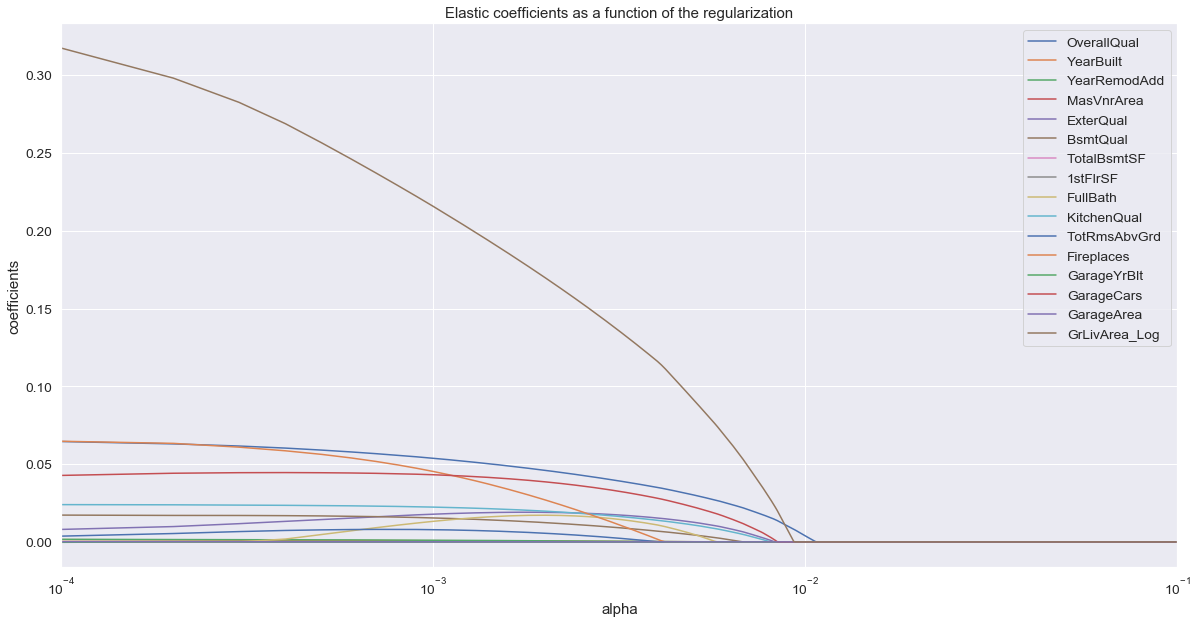

In [1596]:
alphas_elastic   = np.linspace(0.0001,0.1, 1000)

coef_elastic     = []
R2_elastic       = []
CVscorese        = []

# lasso = Lasso(alpha=1)
# normalize=True
for i in alphas_elastic:
    gs_elastic.best_estimator_.set_params(alpha=i,normalize=True).fit(dftrain.drop('SalePrice',1), Saleprice_log)
    coef_elastic.append(gs_elastic.best_estimator_.coef_)
#     coef_lasso.append(lasso.coef_)

df_coef = pd.DataFrame(coef_elastic, index=alphas_elastic, columns=dftrain.drop('SalePrice',1).columns)
title = 'Elastic coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title,figsize=(20,10))
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

In [1630]:
gs_elastic.best_estimator_.coef_

array([5.37562176e-02, 8.70780492e-04, 1.07237432e-03, 0.00000000e+00,
       1.78374139e-02, 1.54023364e-02, 4.97419292e-05, 5.68123998e-05,
       1.32331419e-02, 2.23635136e-02, 7.86883354e-03, 4.52482871e-02,
       0.00000000e+00, 4.31658989e-02, 1.15620026e-04, 2.15600834e-01])

In [1631]:
ecolnames = dftrain.drop('SalePrice',1).columns
eresult = pd.DataFrame(gs_elastic.best_estimator_.coef_).transpose()
print(eresult.columns)

eresult.columns = ecolnames.tolist()
print(ecolnames.tolist())
eresult['intercept'] = gs_elastic.best_estimator_.intercept_ 
eresult = eresult.transpose()
eresult.columns = ['Elastic coefficient']
eresult

RangeIndex(start=0, stop=16, step=1)
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GrLivArea_Log']


,Elastic coefficient
OverallQual,0.053756
YearBuilt,0.000871
YearRemodAdd,0.001072
MasVnrArea,0.000000
ExterQual,0.017837
BsmtQual,0.015402
TotalBsmtSF,0.000050
1stFlrSF,0.000057
FullBath,0.013233
KitchenQual,0.022364


In [1640]:
rcolnames = dftrain.drop('SalePrice',1).columns
rresult = pd.DataFrame(grid_ridge.best_estimator_.coef_).transpose()
print(rresult.columns)

rresult.columns = rcolnames.tolist()
print(rcolnames.tolist())
rresult['intercept'] = grid_ridge.best_estimator_.intercept_ 
rresult = rresult.transpose()
rresult.columns = ['Ridge coefficient']
rresult

# grid_ridge.best_estimator_.coef_

RangeIndex(start=0, stop=16, step=1)
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GrLivArea_Log']


,Ridge coefficient
OverallQual,0.066721
YearBuilt,0.002008
YearRemodAdd,0.001955
MasVnrArea,0.000025
ExterQual,0.007009
BsmtQual,0.017978
TotalBsmtSF,0.000050
1stFlrSF,0.000058
FullBath,-0.012350
KitchenQual,0.023635


In [1642]:
rresult['Features'] = rresult.index
rresult.set_index('Features')

lresult['Features'] = lresult.index
lresult.set_index('Features')
lnresult['Features'] = lnresult.index
lnresult.set_index('Features')
eresult['Features'] = eresult.index
eresult.set_index('Features')

pd.merge(lnresult,rresult,how='outer',on='Features').merge(lresult,how='outer',on='Features').merge(eresult,how='outer',on='Features').set_index('Features')

,Linear coefficient,Ridge coefficient,Lasso coefficient,Elastic coefficient
Features,,,,
OverallQual,0.066281,0.066721,0.081480,0.053756
YearBuilt,0.002018,0.002008,0.001024,0.000871
YearRemodAdd,0.001951,0.001955,0.000797,0.001072
MasVnrArea,0.000024,0.000025,0.000000,0.000000
ExterQual,0.006988,0.007009,0.001508,0.017837
BsmtQual,0.017789,0.017978,0.009038,0.015402
TotalBsmtSF,0.000050,0.000050,0.000058,0.000050
1stFlrSF,0.000056,0.000058,0.000024,0.000057
FullBath,-0.013820,-0.012350,0.000000,0.013233


In [1365]:
grid_lasso.best_estimator_.coef_

array([8.14795752e-02, 1.02433600e-03, 7.97100943e-04, 0.00000000e+00,
       1.50823470e-03, 9.03757692e-03, 5.75446310e-05, 2.43253843e-05,
       0.00000000e+00, 2.09338462e-02, 0.00000000e+00, 2.97550315e-02,
       0.00000000e+00, 4.80908588e-02, 6.11012032e-05, 3.13419241e-01])

In [1623]:
lcolnames = dftrain.drop('SalePrice',1).columns
lresult = pd.DataFrame(grid_lasso.best_estimator_.coef_).transpose()
print(lresult.columns)

lresult.columns = lcolnames.tolist()
print(lcolnames.tolist())
lresult['intercept'] = grid_lasso.best_estimator_.intercept_ 
lresult = lresult.transpose()
lresult.columns = ['Lasso coefficient']
lresult
# grid_lasso.best_estimator_.coef_

RangeIndex(start=0, stop=16, step=1)
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GrLivArea_Log']


,Lasso coefficient
OverallQual,0.081480
YearBuilt,0.001024
YearRemodAdd,0.000797
MasVnrArea,0.000000
ExterQual,0.001508
BsmtQual,0.009038
TotalBsmtSF,0.000058
1stFlrSF,0.000024
FullBath,0.000000
KitchenQual,0.020934


## Decision Tree Regression CART

In [828]:
# Decision Tree Cross Validation and Regression
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()


grid_para_tree = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] , 'random_state': [5] }

grid_search_tree = GridSearchCV(DecisionTreeRegressor(), grid_para_tree, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
grid_search_tree.fit(dftrain.drop('SalePrice',1), Saleprice_log)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   13.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': [11, 12, 13, 14],
                         'max_leaf_nodes': [None, 12, 15, 18, 20],
                         'min_sam

In [829]:
tree_y_pred = grid_search_tree.predict(dftrain.drop('SalePrice',1))

print('Mean squared error: %.2f'% mean_squared_error(Saleprice_log, tree_y_pred))

# The coefficient of determination, the higher the better: R^2 = 1-RSS/TSS
print('Coefficient of determination R^2: %.2f'% r2_score(Saleprice_log, tree_y_pred))

Mean squared error: 0.01
Coefficient of determination R^2: 0.91


<Figure size 2880x1440 with 0 Axes>

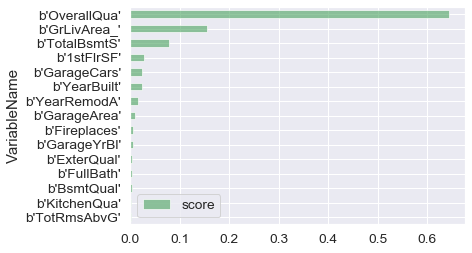

In [1336]:
fig = plt.figure(figsize=(40, 20))
feature_importance = list(zip(dftrain.drop('SalePrice',1).columns, grid_search_tree.best_estimator_.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'VariableName':name,'score':score})[:15].sort_values(by='score').plot.barh(x='VariableName', y='score',facecolor='g', alpha=float(score[0]))



In [830]:
grid_search_tree.best_params_

{'max_depth': 9,
 'max_features': 13,
 'max_leaf_nodes': None,
 'min_samples_split': 25,
 'presort': False,
 'random_state': 5}

### Methods:

- **fit**: Build a decision tree from the training set (X, y).

- **predict**: 	Predict class or regression value for X.

- **predict_log_proba**	Predict class log-probabilities of the input samples X.

- **predict_proba**	Predict class probabilities of the input samples X.

- **score**:	Return the mean accuracy on the given test data and labels.

- **set_params**:	Set the parameters of this estimator.

- **get_params**: Get parameters for this estimator.

### Arguments:

- **criterion**: "gini" or "entropy", corresponding to the criteria of "gini impurity" and "information gain". default = 'gini'.

- **max_depth**: The maximum depth of the tree. default = None, which means the nodes will be expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- **min_samples_split**: The minimum number of samples required to split. default = 2.

- **min_samples_leaf **: The minimum number of samples required to be at a terminate node. default = 1.

In [1135]:
from sklearn.utils import resample

# Bootstrap aggregation sample generation
# Use this to test model performance:

Xb, yb = resample (dftrain.drop('SalePrice',1), Saleprice_log,n_samples=3000)
print('Bootstrapped vars',Xb.shape)
print('Bootstrapped target',yb.shape)





Bootstrapped vars (3000, 16)
Bootstrapped target (3000,)


In [841]:
pd.Series(yb.head())

379     12.095141
474     12.433208
310     12.017331
555     11.635143
1119    11.803354
Name: SalePrice, dtype: float64

In [1341]:

# Random Forest
# It randomly selects observations as well.

# BAGGING trees:
# Bootstrap AGGregation

# good: decrease variance, 
# bad: but they keep bias as they use all columns

# Random Forest:
# BOth decrease variance 
# Decrease bias using random subset of columns

# Bad: complex - still possible to overfit
# Garbage in garbage out.

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
rf_model    = RandomForestRegressor()
bagging     = BaggingRegressor()



grid_para_forest = { 'max_depth' : [1,5,7,10,15,20], # The maximum depth of the tree. - {'max_depth': 7}
#                      'max_features' : [5,10,16],  ## Them max features at split {'max_features': 5}
                     'max_leaf_nodes' : [None, 10,15,18,20], # If None then unlimited number of leaf nodes
#                     'min_samples_split' : [20,25,30], # 
                     'bootstrap':[True], # True is best
                    'n_estimators':[100]# 'n_estimators':[10,30,50,100] # 100 is the best
                   }

grid_search_forest = GridSearchCV(rf_model, grid_para_forest, cv=nr_cv, scoring = score_calc)
grid_search_forest.fit(dftrain.drop('SalePrice',1), Saleprice_log)


forest_y_pred = grid_search_forest.predict(dftrain.drop('SalePrice',1))

print('Mean squared error: %.2f'% mean_squared_error(Saleprice_log, forest_y_pred))

# The coefficient of determination, the higher the better: R^2 = 1-RSS/TSS
print('Coefficient of determination R^2: %.2f'% r2_score(Saleprice_log, forest_y_pred))

Mean squared error: 0.00
Coefficient of determination R^2: 0.98


In [ ]:
# comment on OOB and train score!!!

In [1343]:
grid_search_forest.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_leaf_nodes': None,
 'n_estimators': 100}

In [1344]:
grid_search_forest.best_score_

-0.024556510663401438

## Feature Importance in Random Forest Model


<Figure size 2880x1440 with 0 Axes>

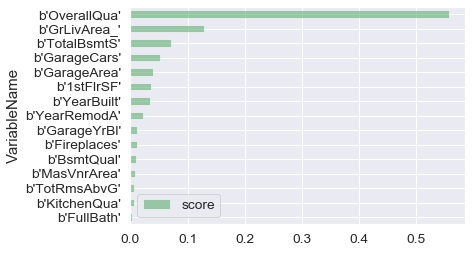

In [912]:
# Feature Importance Visualization
fig = plt.figure(figsize=(40, 20))
feature_importance = list(zip(dftrain.drop('SalePrice',1).columns, grid_search_forest.best_estimator_.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'VariableName':name,'score':score})[:15].sort_values(by='score').plot.barh(x='VariableName', y='score',facecolor='g', alpha=float(score[0]))


In [927]:
dummydf  = dftrain.copy()
def makedummies(df,var, pre_fix = 'Class'):
    Z = pd.get_dummies(df[var], prefix = pre_fix)
    df_dummified = pd.concat((df.drop(var,1), Z), axis=1)
    return df_dummified

In [1126]:
# Comparing Results
allmodels = ['grid_linear','grid_ridge','grid_lasso','gs_elastic']#,'grid_search_tree','grid_search_forest']
allmodels2 = [ grid_linear , grid_ridge,grid_lasso,gs_elastic]#,grid_search_tree,grid_search_forest]

# grid_linear
# grid_ridge
# grid_lasso
# gs_elastic
# grid_search_tree
# grid_search_forest
coef = []
R2   = []
intercept   = []
MSE  = []
score =[]
BP   = {}
for i in allmodels2:
    coef.append(i.best_estimator_.coef_)
    intercept.append(i.best_estimator_.intercept_)
    R2.append(r2_score(Saleprice_log, i.predict(dftrain.drop('SalePrice',1))))
    MSE.append(mean_squared_error(Saleprice_log,i.predict(dftrain.drop('SalePrice',1)) ))
    score.append(i.best_score_)


In [1132]:
os.listdir()
os.getcwd()

'/Users/karolylajko/Documents/Academy/DataScienceBootcamp2020/Projects/Kaggle/Housedata'